#Importing Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import os

#Training (ANN)

Train/Test split

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

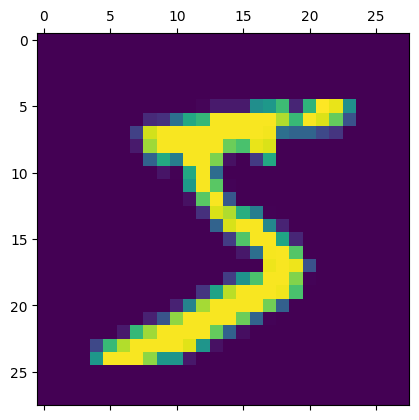

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

Normalising the dataset

In [ ]:
X_train = X_train/255
X_test = X_test/255

Defining the training parameters

In [ ]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='leaky_relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, epochs=30, callbacks=[callback])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3181 - accuracy: 0.9101
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1719 - accuracy: 0.9510
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1286 - accuracy: 0.9626
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9688
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9733
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.9777
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9794
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0574 - accuracy: 0.9820
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9840
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.045

Evaluation

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9750


[0.13294100761413574, 0.9750000238418579]

#Training (CNN)

Reshaping the dataset to have a 3rd dimention, as CNN takes in three dimensional inputs i.e., length, height and widgth(representing the RGB values) of a picture

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Defining training parameters

In [ ]:
model = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, callbacks=[callback])

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1627 - accuracy: 0.9516
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9836
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9893
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.005

Evaluation

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9868


[0.07204266637563705, 0.9868000149726868]